In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Importando os datasets
df_taxi_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_destinations = pd.read_csv('/datasets/project_sql_result_04.csv')


In [2]:
# Visualizar as primeiras linhas
print(df_taxi_companies.head())
print(df_taxi_companies.info())

print(df_destinations.head())
print(df_destinations.info())


                      company_name  trips_amount
0                        Flash Cab         19558
1        Taxi Affiliation Services         11422
2                Medallion Leasing         10367
3                       Yellow Cab          9888
4  Taxi Affiliation Service Yellow          9299
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
  dropoff_location_name  average_trips
0                  Loop   10727.466667
1           River North    9523.666667
2         Streeterville    6664.666667
3             West Loop    5163.666667
4                O'Hare    2546.900000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  D

In [3]:
# Ordenar por average_trips em ordem decrescente e pegar os 10 primeiros
top_10_destinations = df_destinations.sort_values(by='average_trips', ascending=False).head(10)


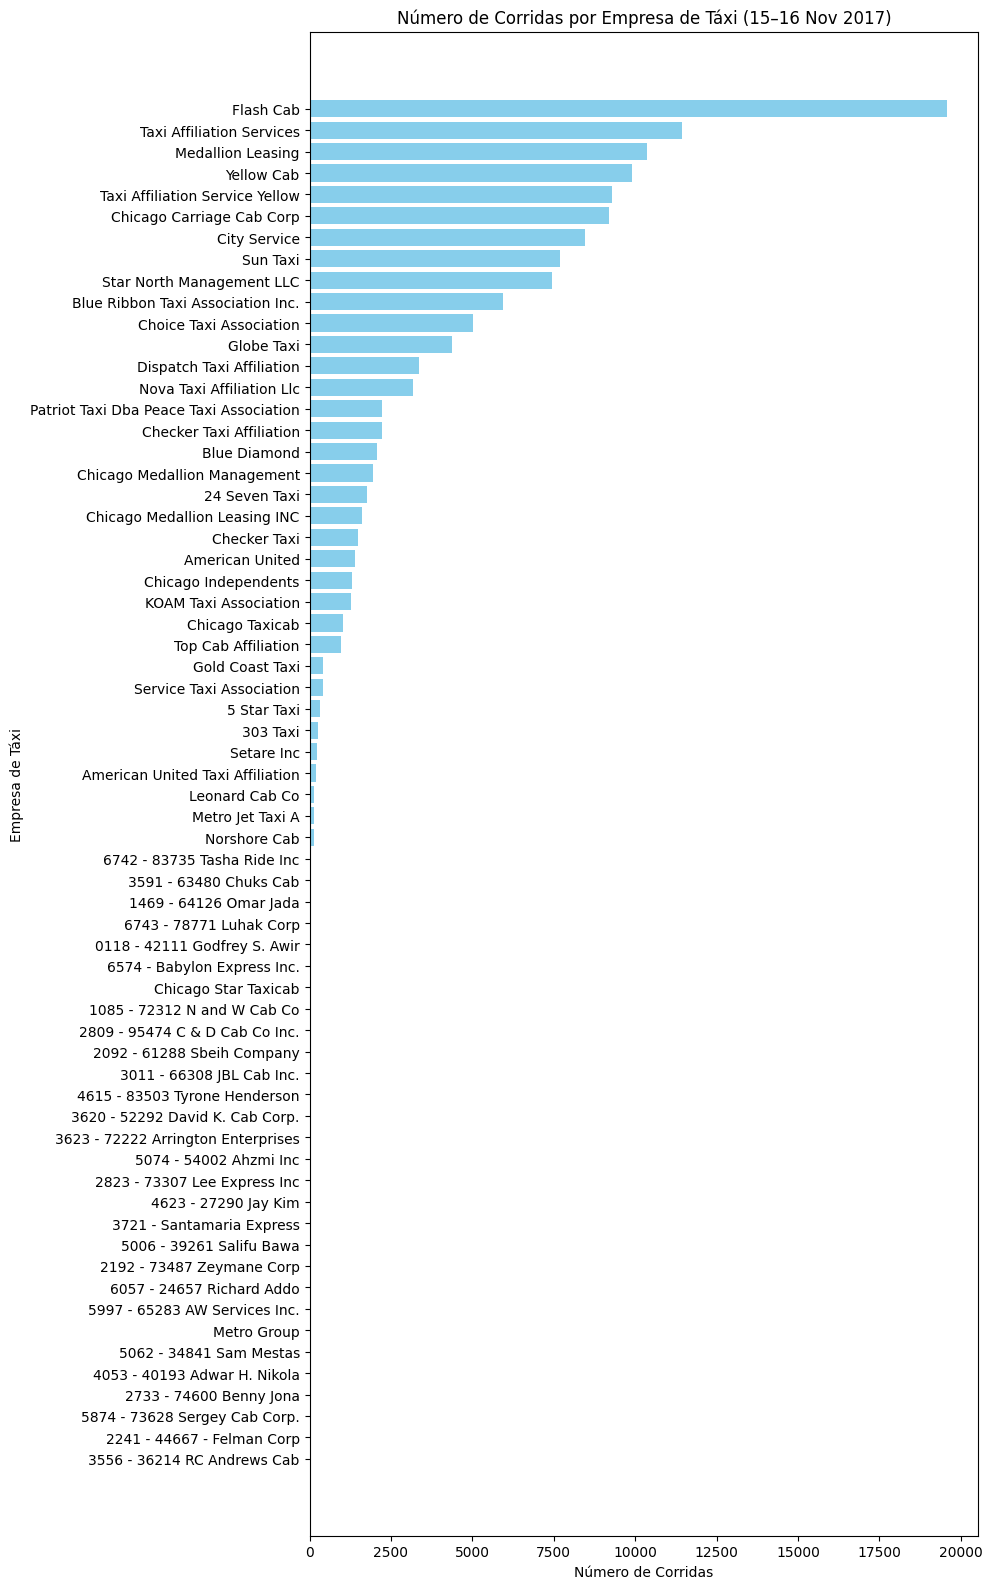

In [6]:
df_sorted = df_taxi_companies.sort_values(by='trips_amount', ascending=True)

plt.figure(figsize=(10,16))  # altura maior
plt.barh(df_sorted['company_name'], df_sorted['trips_amount'], color='skyblue')
plt.title('Número de Corridas por Empresa de Táxi (15–16 Nov 2017)')
plt.xlabel('Número de Corridas')
plt.ylabel('Empresa de Táxi')
plt.tight_layout()
plt.show()



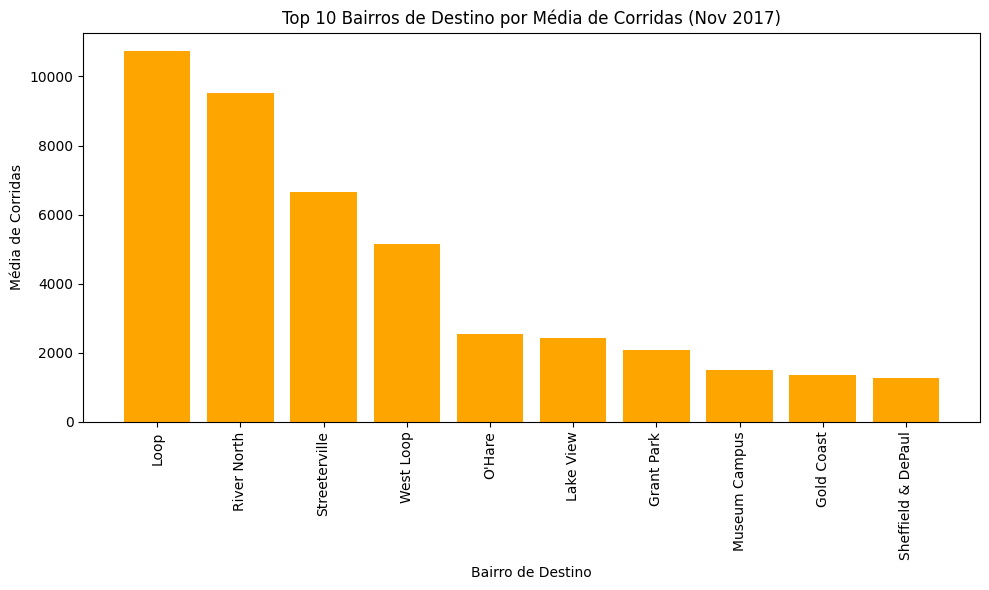

In [5]:
plt.figure(figsize=(10,6))
plt.bar(top_10_destinations['dropoff_location_name'], top_10_destinations['average_trips'], color='orange')
plt.xticks(rotation=90)
plt.title('Top 10 Bairros de Destino por Média de Corridas (Nov 2017)')
plt.xlabel('Bairro de Destino')
plt.ylabel('Média de Corridas')
plt.tight_layout()
plt.show()


Gráfico 1: A Zuber está entrando em um mercado onde poucas empresas concentram grande parte da demanda.

Se quiser competir com essas empresas, pode ser necessário:

Criar estratégias agressivas de marketing nos bairros onde elas atuam fortemente

Focar em diferenciais como preço, conforto, app mais eficiente, tempo de espera menor

Vale considerar formar parcerias com empresas menores (que têm frota, mas pouca corrida)

Gráfico 2: A Zuber deveria priorizar sua atuação nos bairros do centro expandido de Chicago, onde a demanda por corridas é mais alta

Oferecer pontos de embarque otimizados e mais motoristas nessas regiões pode reduzir o tempo de espera e atrair usuários

Corridas do/para o aeroporto devem ser monitoradas de perto — talvez com tarifa especial, ofertas, ou parceria com hotéis

Conclusão geral: Alta concentração de mercado: poucas empresas dominam — então diferenciar-se é crucial.

Alta demanda em regiões centrais e comerciais: foco em Loop, River North, Streeterville, West Loop.

Oportunidade em corridas ao aeroporto (O’Hare): pode ser explorada com campanhas direcionadas.

Zuber pode se destacar com:

Algoritmos de roteamento inteligentes

Incentivos para motoristas em zonas de alta demanda

App com experiência superior ao das concorrentes tradicionais

In [7]:
import pandas as pd

df = pd.read_csv('/datasets/project_sql_result_07.csv')

# Verificando o conteúdo
print(df.head())
print(df.info())


              start_ts weather_conditions  duration_seconds
0  2017-11-25 16:00:00               Good            2410.0
1  2017-11-25 14:00:00               Good            1920.0
2  2017-11-25 12:00:00               Good            1543.0
3  2017-11-04 10:00:00               Good            2512.0
4  2017-11-11 07:00:00               Good            1440.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB
None


In [8]:
# Converter start_ts em datetime
df['start_ts'] = pd.to_datetime(df['start_ts'])

# Criar coluna para dia da semana
df['weekday'] = df['start_ts'].dt.dayofweek  # sábado = 5

# Filtrar grupo A (sábados chuvosos)
group_a = df[(df['weekday'] == 5) & (df['weather_conditions'] == 'Bad')]['duration_seconds']

# Grupo B: todos os outros (inclusive sábados não chuvosos e dias úteis)
group_b = df[~((df['weekday'] == 5) & (df['weather_conditions'] == 'Bad'))]['duration_seconds']


teste t de Welch: Teste adequado para comparar médias entre dois grupos independentes com possíveis variâncias diferentes; 

H₀ (nula): não há diferença na média da duração das corridas em sábados chuvosos
 
H₁ (alternativa): há diferença na média das durações

Como queremos testar se há diferença, a hipótese nula parte do pressuposto de igualdade. Só rejeitamos esse pressuposto se houver evidência estatística suficiente (via valor-p).

In [9]:
from scipy import stats

# Nível de significância
alpha = 0.05

# Teste t de Welch
t_stat, p_value = stats.ttest_ind(group_a, group_b, equal_var=False)

print(f'Estatística t: {t_stat:.2f}')
print(f'Valor-p: {p_value:.4f}')

if p_value < alpha:
    print('Rejeitamos a hipótese nula: há evidências de que a duração média muda em sábados chuvosos.')
else:
    print('Não rejeitamos a hipótese nula: não há evidências suficientes de diferença na média.')


Estatística t: 7.19
Valor-p: 0.0000
Rejeitamos a hipótese nula: há evidências de que a duração média muda em sábados chuvosos.
